<a href="https://colab.research.google.com/github/inarentifi/inared/blob/main/%CE%91%CF%85%CF%84%CE%BF%CE%BA%CE%B9%CE%BD%CE%B7%CF%84%CE%B9%CF%83%CF%84%CE%B9%CE%BA%CE%AC_%CE%91%CF%84%CF%85%CF%87%CE%AE%CE%BC%CE%B1%CF%84%CE%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
#!python -m spacy download el_core_news_sm

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import spacy
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [43]:
nlp = spacy.load('el_core_news_sm')

In [45]:
df = pd.read_excel("/content/drive/MyDrive/Αυτοκινητιστικα Ατυχηματα.xlsx")
df

,type,source,title,text,date,time
0,web,adieksodos.gr,Θεσσαλονίκη: Τουριστικό λεωφορείο έπεσε πάνω σ...,Πανικός το πρωί στη Θεσσαλονίκη. Οδηγός λεωφορ...,2023-06-28,22:51:29
1,web,agrinio24.gr,Θεσσαλονίκη: Τουριστικό λεωφορείο έπεσε πάνω σ...,Πανικός το πρωί στη Θεσσαλονίκη. Οδηγός λεωφορ...,2023-06-28,21:57:16
2,web,megatv.com,Θεσσαλονίκη: Τουριστικό λεωφορείο έπεσε πάνω σ...,Από τύχη δεν θρηνήσαμε θύματα σήμερα το πρωί σ...,2023-06-28,20:40:00
3,web,toavriotisygeias.gr,Πόνος στο άνω μέρος της πλάτης: Αιτίες και πώς...,Εάν υποφέρετε από πόνο στο πάνω μέρος της πλάτ...,2023-06-28,20:05:11
4,web,intronews.gr,Νέο Hyundai Kona 1.6 Hybrid των 141 ίππων,Όταν πρωτοπαρουσιάστηκε το 2017 το Kona ήταν ο...,2023-06-28,16:32:39
...,...,...,...,...,...,...
4995,twitter,toaerodromiogr,https://twitter.com/toaerodromiogr/status/1619...,Τροχαίο με τρεις τραυματίες στη Θεσσαλονίκη – ...,2023-01-30,08:55:40
4996,twitter,ERT3Social,https://twitter.com/ERT3Social/status/16199515...,Τρεις τραυματίες σε σφοδρή σύγκρουση αυτοκινήτ...,2023-01-30,08:51:59
4997,twitter,gazzetta_gr,https://twitter.com/gazzetta_gr/status/1619951...,Αυτή η καραμπόλα δεν έχει προηγούμενο.\n\n85 ο...,2023-01-30,08:51:52
4998,web,ertnews.gr,Τρεις τραυματίες σε σφοδρή σύγκρουση αυτοκινήτ...,Τροχαίο ατύχημα\nμε τρεις τραυματίες σημειώθηκ...,2023-01-30,08:44:46


In [46]:
df.dropna(inplace=True)

In [47]:
df = df.reset_index(drop=True)

In [48]:
df.head()

,type,source,title,text,date,time
0,web,adieksodos.gr,Θεσσαλονίκη: Τουριστικό λεωφορείο έπεσε πάνω σ...,Πανικός το πρωί στη Θεσσαλονίκη. Οδηγός λεωφορ...,2023-06-28,22:51:29
1,web,agrinio24.gr,Θεσσαλονίκη: Τουριστικό λεωφορείο έπεσε πάνω σ...,Πανικός το πρωί στη Θεσσαλονίκη. Οδηγός λεωφορ...,2023-06-28,21:57:16
2,web,megatv.com,Θεσσαλονίκη: Τουριστικό λεωφορείο έπεσε πάνω σ...,Από τύχη δεν θρηνήσαμε θύματα σήμερα το πρωί σ...,2023-06-28,20:40:00
3,web,toavriotisygeias.gr,Πόνος στο άνω μέρος της πλάτης: Αιτίες και πώς...,Εάν υποφέρετε από πόνο στο πάνω μέρος της πλάτ...,2023-06-28,20:05:11
4,web,intronews.gr,Νέο Hyundai Kona 1.6 Hybrid των 141 ίππων,Όταν πρωτοπαρουσιάστηκε το 2017 το Kona ήταν ο...,2023-06-28,16:32:39


In [49]:
df.tail()

,type,source,title,text,date,time
4893,twitter,toaerodromiogr,https://twitter.com/toaerodromiogr/status/1619...,Τροχαίο με τρεις τραυματίες στη Θεσσαλονίκη – ...,2023-01-30,08:55:40
4894,twitter,ERT3Social,https://twitter.com/ERT3Social/status/16199515...,Τρεις τραυματίες σε σφοδρή σύγκρουση αυτοκινήτ...,2023-01-30,08:51:59
4895,twitter,gazzetta_gr,https://twitter.com/gazzetta_gr/status/1619951...,Αυτή η καραμπόλα δεν έχει προηγούμενο.\n\n85 ο...,2023-01-30,08:51:52
4896,web,ertnews.gr,Τρεις τραυματίες σε σφοδρή σύγκρουση αυτοκινήτ...,Τροχαίο ατύχημα\nμε τρεις τραυματίες σημειώθηκ...,2023-01-30,08:44:46
4897,web,politic.gr,Θεσσαλονίκη: Τρεις τραυματίες σε σφοδρή σύγκρο...,Τρεις τραυματίες είναι ο απολογισμός τροχαίου ...,2023-01-30,08:44:36


In [50]:
df["full_text"] = df["title"] + df["text"]

In [51]:
df['datetime'] = pd.to_datetime(df['date'],  format= "%Y-%m-%d")

In [52]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [53]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [55]:
short_df = df[['datetime','text' ]]

In [56]:
short_df['year'] = pd.DatetimeIndex(short_df['datetime']).year
short_df['month'] = pd.DatetimeIndex(short_df['datetime']).month
short_df['day'] = pd.DatetimeIndex(short_df['datetime']).day

<ipython-input-56-61fee6f0792e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['year'] = pd.DatetimeIndex(short_df['datetime']).year
<ipython-input-56-61fee6f0792e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['month'] = pd.DatetimeIndex(short_df['datetime']).month
<ipython-input-56-61fee6f0792e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

<Axes: ylabel='day'>

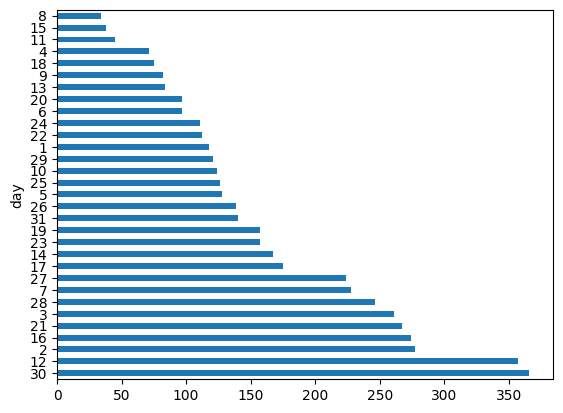

In [57]:
short_df['day'].value_counts().plot(kind='barh') # ποσα αρθα δημοσιευονται τη μερα

In [58]:
short_df.reset_index(inplace=True)
short_df.set_index('datetime', inplace=True)
short_df #χρησιμοποιω το datetime σαν index

,index,text,year,month,day
datetime,,,,,
2023-06-28,0,Πανικός το πρωί στη Θεσσαλονίκη. Οδηγός λεωφορ...,2023,6,28
2023-06-28,1,Πανικός το πρωί στη Θεσσαλονίκη. Οδηγός λεωφορ...,2023,6,28
2023-06-28,2,Από τύχη δεν θρηνήσαμε θύματα σήμερα το πρωί σ...,2023,6,28
2023-06-28,3,Εάν υποφέρετε από πόνο στο πάνω μέρος της πλάτ...,2023,6,28
2023-06-28,4,Όταν πρωτοπαρουσιάστηκε το 2017 το Kona ήταν ο...,2023,6,28
...,...,...,...,...,...
2023-01-30,4893,Τροχαίο με τρεις τραυματίες στη Θεσσαλονίκη – ...,2023,1,30
2023-01-30,4894,Τρεις τραυματίες σε σφοδρή σύγκρουση αυτοκινήτ...,2023,1,30
2023-01-30,4895,Αυτή η καραμπόλα δεν έχει προηγούμενο.\n\n85 ο...,2023,1,30


In [59]:
text = short_df['text'].str.cat(sep = ' ')

In [60]:
text

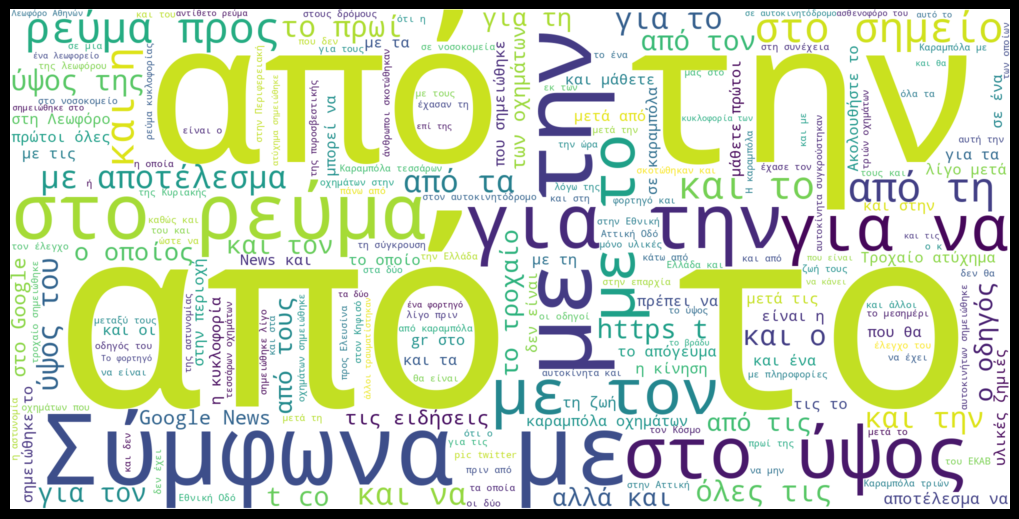

In [61]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'white'
 ).generate(text) # το όνομα του κειμένου
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

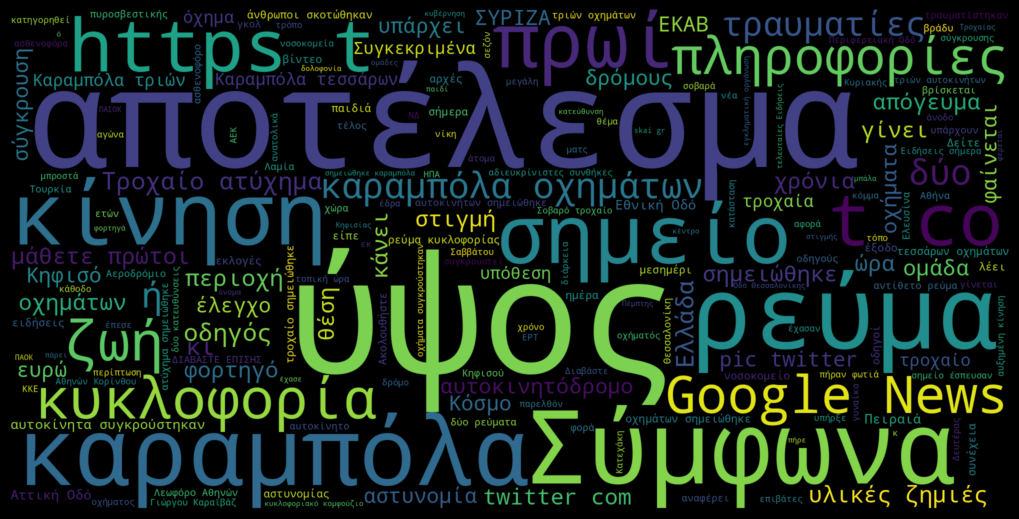

In [62]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(text)
fig = plt.figure(
    figsize = (10, 8),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [63]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [64]:
short_df = df[['date','text' ]]

In [65]:
short_df['date'] = pd.to_datetime(short_df['date'], format='%Y-%m-%d')


<ipython-input-65-a5abab2c2597>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['date'] = pd.to_datetime(short_df['date'], format='%Y-%m-%d')


In [66]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [67]:
matrix = vec.fit_transform(short_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']

angry_words = emolex_df[emolex_df.Anger == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

fear_words = emolex_df[emolex_df.Fear == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [69]:
short_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_df['fear'] = wordcount_df[fear_words].sum(axis=1)

<ipython-input-69-ba535ce3a623>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['anger'] = wordcount_df[angry_words].sum(axis=1)
<ipython-input-69-ba535ce3a623>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_df['positive'] = wordcount_df[positive_words].sum(axis=1)
<ipython-input-69-ba535ce3a623>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [70]:
short_df

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2023-06-28,Πανικός το πρωί στη Θεσσαλονίκη. Οδηγός λεωφορ...,3,10,3,3,4,5,6,3,5,3
1,2023-06-28,Πανικός το πρωί στη Θεσσαλονίκη. Οδηγός λεωφορ...,3,10,3,3,4,5,6,3,5,3
2,2023-06-28,Από τύχη δεν θρηνήσαμε θύματα σήμερα το πρωί σ...,5,14,4,4,7,7,8,5,7,5
3,2023-06-28,Εάν υποφέρετε από πόνο στο πάνω μέρος της πλάτ...,33,38,5,34,7,10,8,28,63,26
4,2023-06-28,Όταν πρωτοπαρουσιάστηκε το 2017 το Kona ήταν ο...,1,5,1,5,0,1,2,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,2023-01-30,Τροχαίο με τρεις τραυματίες στη Θεσσαλονίκη – ...,1,0,0,0,1,0,0,1,1,1
4894,2023-01-30,Τρεις τραυματίες σε σφοδρή σύγκρουση αυτοκινήτ...,1,0,0,0,1,0,0,1,1,1
4895,2023-01-30,Αυτή η καραμπόλα δεν έχει προηγούμενο.\n\n85 ο...,0,0,0,1,0,0,1,1,1,0
4896,2023-01-30,Τροχαίο ατύχημα\nμε τρεις τραυματίες σημειώθηκ...,1,0,0,1,1,2,3,3,3,2


In [71]:
short_df.reset_index(inplace=True)
short_df.set_index('date', inplace=True)
short_df

,index,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
date,,,,,,,,,,,,
2023-06-28,0,Πανικός το πρωί στη Θεσσαλονίκη. Οδηγός λεωφορ...,3,10,3,3,4,5,6,3,5,3
2023-06-28,1,Πανικός το πρωί στη Θεσσαλονίκη. Οδηγός λεωφορ...,3,10,3,3,4,5,6,3,5,3
2023-06-28,2,Από τύχη δεν θρηνήσαμε θύματα σήμερα το πρωί σ...,5,14,4,4,7,7,8,5,7,5
2023-06-28,3,Εάν υποφέρετε από πόνο στο πάνω μέρος της πλάτ...,33,38,5,34,7,10,8,28,63,26
2023-06-28,4,Όταν πρωτοπαρουσιάστηκε το 2017 το Kona ήταν ο...,1,5,1,5,0,1,2,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-30,4893,Τροχαίο με τρεις τραυματίες στη Θεσσαλονίκη – ...,1,0,0,0,1,0,0,1,1,1
2023-01-30,4894,Τρεις τραυματίες σε σφοδρή σύγκρουση αυτοκινήτ...,1,0,0,0,1,0,0,1,1,1
2023-01-30,4895,Αυτή η καραμπόλα δεν έχει προηγούμενο.\n\n85 ο...,0,0,0,1,0,0,1,1,1,0


<Axes: xlabel='date'>

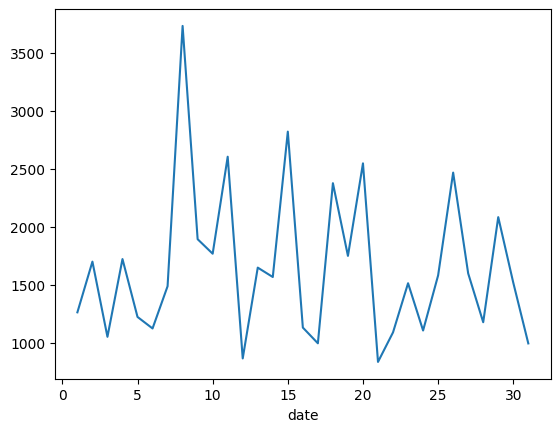

In [72]:
short_df['text'].str.len().groupby(by=short_df.index.day).mean().plot()


<Axes: xlabel='date'>

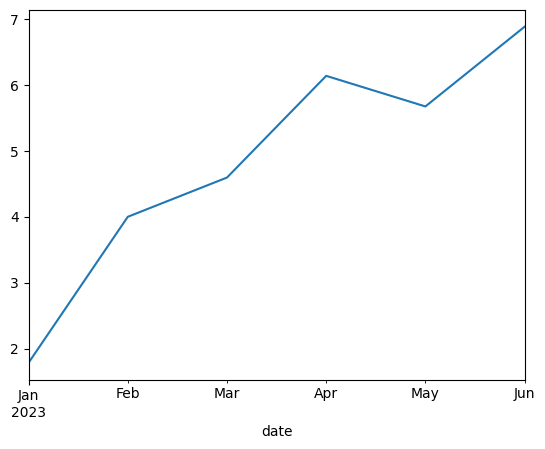

In [73]:
short_df['positive'].resample('M').mean().plot()

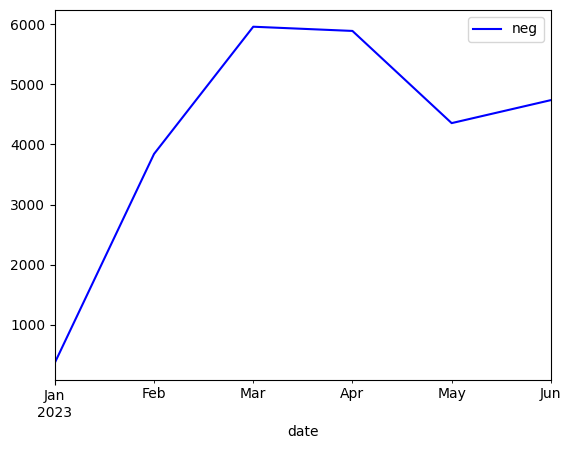

In [74]:
short_df['negative'].resample('M').sum().plot(color = 'b',label = 'neg').legend()

<Axes: xlabel='date'>

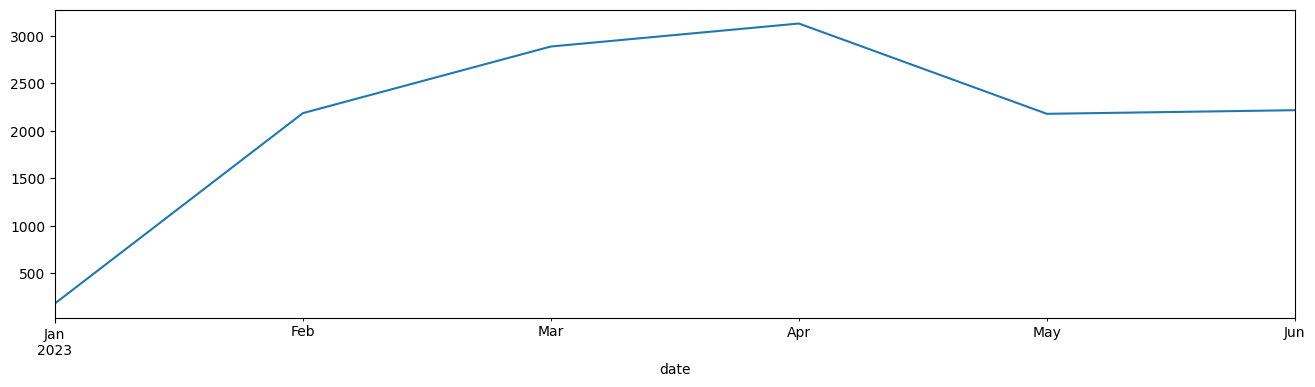

In [75]:
short_df['anger'].resample('M').sum().plot(figsize=(16,4))

<Axes: xlabel='date'>

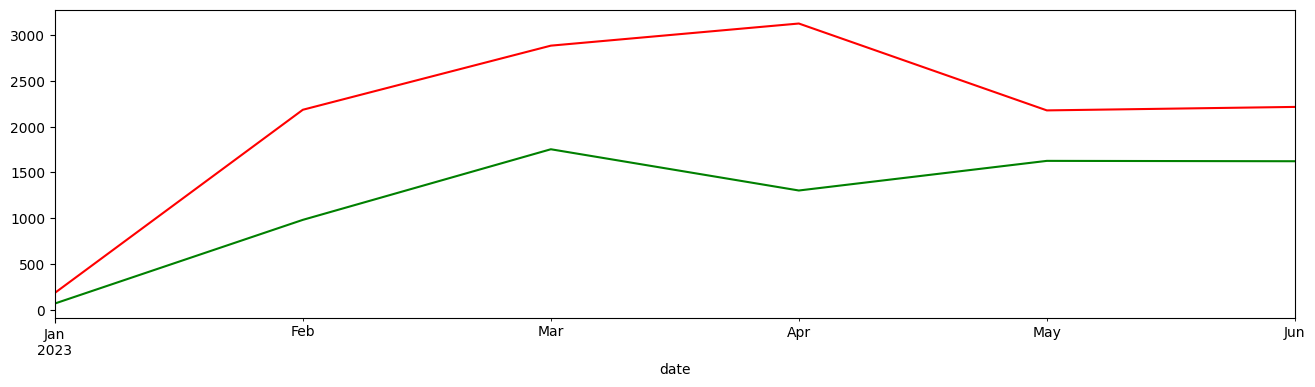

In [76]:
ax = short_df['anger'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_df['joy'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')


<Axes: xlabel='date'>

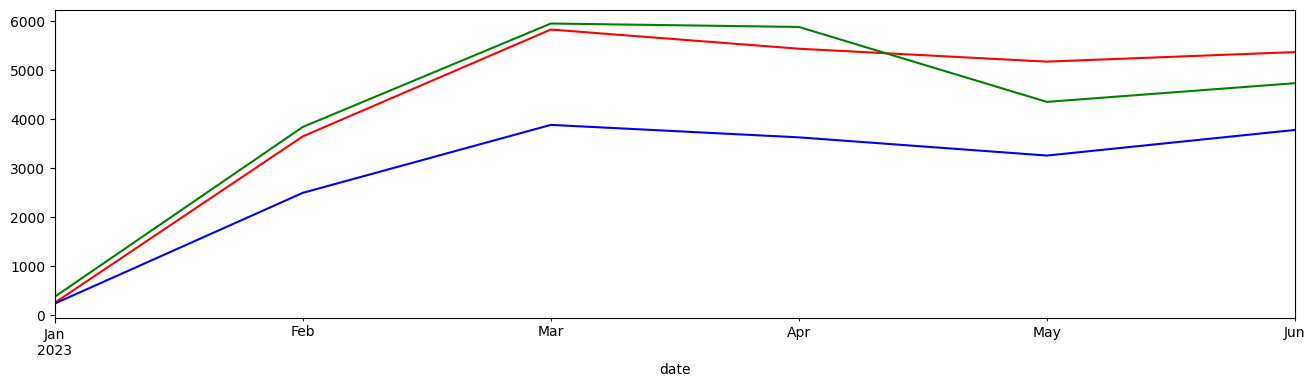

In [77]:
ax = short_df['positive'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_df['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_df['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [78]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [79]:
plt.style.use('Solarize_Light2')

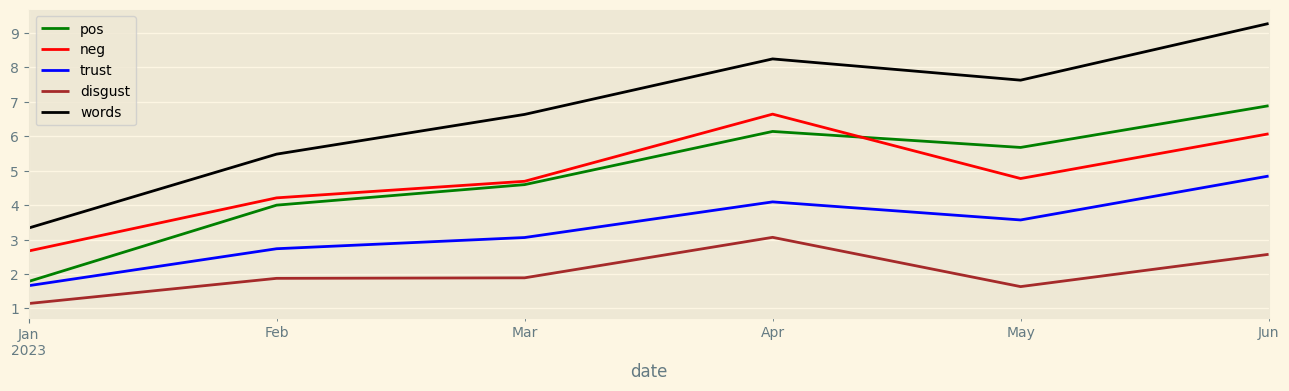

In [80]:
ax = short_df['positive'].resample('M').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_df['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_df['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_df['disgust'].resample('M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_df['text'].str.len().resample('M').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()


<Axes: xlabel='date'>

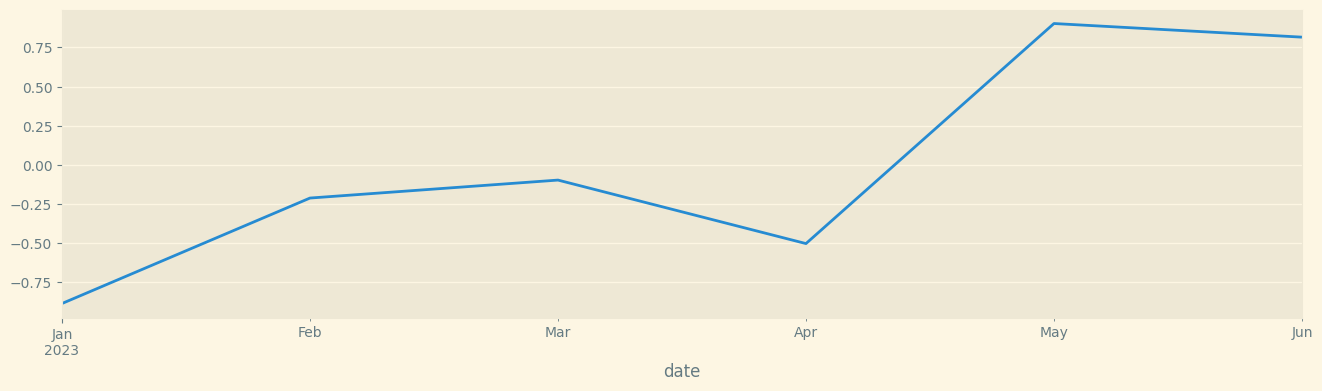

In [81]:
short_df['pos/neg'] = short_df['positive'] - short_df['negative']
short_df['pos/neg'].resample('M').mean().plot(figsize=(16,4))

In [82]:
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='date'>

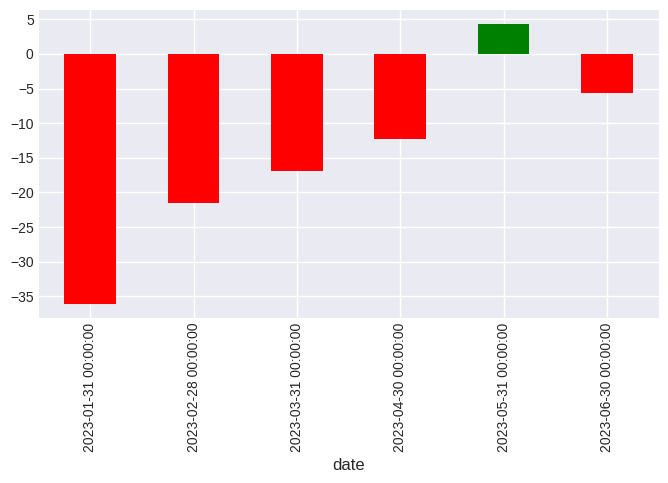

In [83]:
short_df['(-)αρνητικότητα | θετικότητα(+)'] = short_df.positive*100//short_df[['positive','negative']].sum(
        axis=1) - short_df.negative*100//short_df[['positive','negative']].sum(axis=1)

short_df['(-)αρνητικότητα | θετικότητα(+)'].resample('M').mean().plot(kind='bar',
                                                                               color=(short_df['(-)αρνητικότητα | θετικότητα(+)'].resample('M').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))


In [84]:
short_df[(short_df['(-)αρνητικότητα | θετικότητα(+)'] == short_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_df['(-)αρνητικότητα | θετικότητα(+)'] == short_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]


,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
date,,,,
2023-06-28,11,2,0,100.0
2023-06-28,20,1,0,100.0
2023-06-28,21,2,0,100.0
2023-06-27,31,7,0,100.0
2023-06-26,83,4,0,100.0
...,...,...,...,...
2023-01-30,4893,0,1,-100.0
2023-01-30,4894,0,1,-100.0
2023-01-30,4895,0,1,-100.0
